In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-air-quality-data/data.csv


In [13]:
# rollno=102303729
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [14]:
df = pd.read_csv("/kaggle/input/india-air-quality-data/data.csv", encoding="latin1")   # filename may vary
df.head()


/tmp/ipykernel_55/3761960071.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/india-air-quality-data/data.csv", encoding="latin1")   # filename may vary


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [15]:
# Find NO2 column automatically
no2_col = [col for col in df.columns if "NO2" in col.upper()][0]
print("Using column:", no2_col)

x = df[no2_col].dropna().values

Using column: no2


In [22]:
r=102303729
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("ar =", ar)
print("br =", br)

ar = 0.15000000000000002
br = 1.5


In [23]:
def transform(x, ar, br):
    return x + ar * np.sin(br * x)

z = transform(x, ar, br)

In [24]:
def pdf(z, c, lam, mu):
    exponent = -lam * (z - mu)**2
    exponent = np.clip(exponent, -700, 700)  # numerical safety
    return c * np.exp(exponent)

In [26]:
hist, bin_edges = np.histogram(z, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

In [27]:
initial_guess = [1.0, 0.01, np.mean(z)]
params, _ = curve_fit(pdf, bin_centers, hist, p0=initial_guess)
c_hat, lambda_hat, mu_hat = params
print("Estimated Parameters:")
print("c =", c_hat)
print("λ =", lambda_hat)
print("μ =", mu_hat)

Estimated Parameters:
c = 0.0262408538938648
λ = 0.0019237373858478758
μ = 19.679776959069144


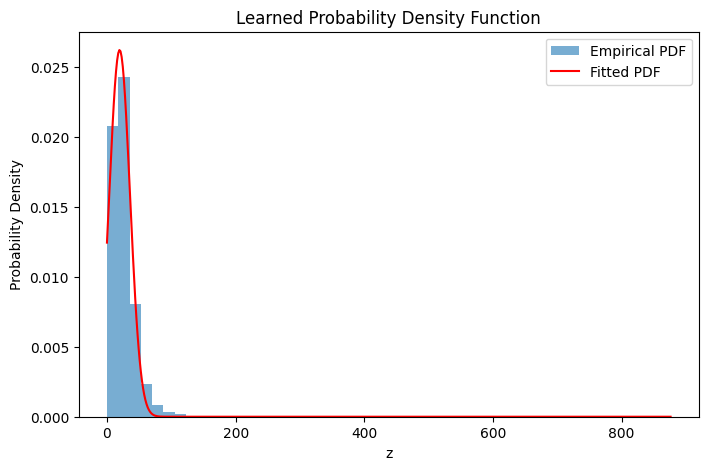

In [21]:
z_range = np.linspace(min(z), max(z), 500)
pdf_fit = pdf(z_range, c_hat, lambda_hat, mu_hat)

plt.figure(figsize=(8,5))
plt.hist(z, bins=50, density=True, alpha=0.6, label="Empirical PDF")
plt.plot(z_range, pdf_fit, 'r', label="Fitted PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Learned Probability Density Function")
plt.show()